In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics


scarl =StandardScaler()
data = pd.read_csv('kc_house_data.csv')

data = data.sort_values(by=['price'])

x1=data['sqft_living15'].values[:,np.newaxis]
x2=data['sqft_living'].values[:,np.newaxis]
x3=data['grade'].values[:,np.newaxis]
x4=data['bathrooms'].values[:,np.newaxis]
x5=data['sqft_above'].values[:,np.newaxis]
y=data["price"].values
x={'sqft_living15':x1,'sqft_living':x2,'grade':x3,'bathrooms':x4,'sqft_above':x5}

x2= data[['sqft_living15','sqft_living','grade','bathrooms','sqft_above']]

les caractéristiques les plus importantes sont:<br>
-**sqft_living15** sa relation avec le prix est: 0.5<br>
-**sqft_living** sa relation avec le prix est: 0.7<br>
-**grade** sa relation avec le prix est: 0.67<br>
-**bathrooms** sa relation avec le prix est: 0.51<br>
-**sqft_above** sa relation avec le prix est: 0.61<br>




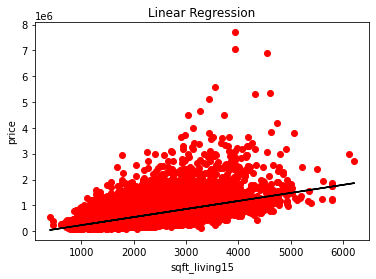

le performance de la régression linéaire
MSE 90542666016.91881
R squared 0.3435640498639617


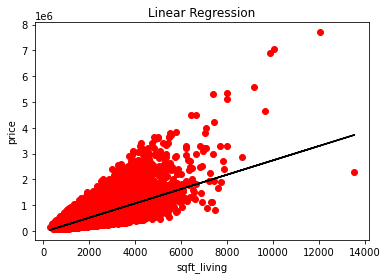

le performance de la régression linéaire
MSE 70902092130.73372
R squared 0.48595856227853784


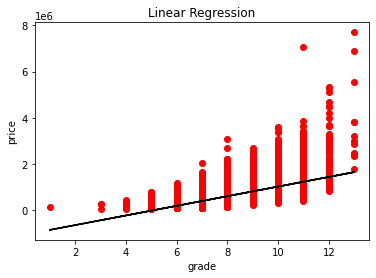

le performance de la régression linéaire
MSE 75895629350.02054
R squared 0.4497553280102903


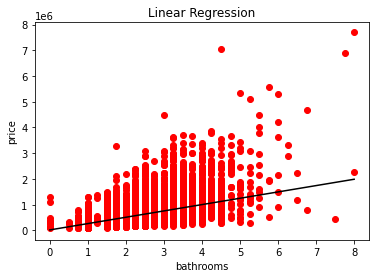

le performance de la régression linéaire
MSE 99564648226.80856
R squared 0.2781545172690991


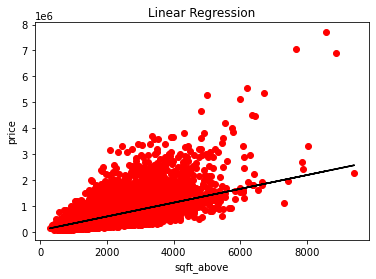

le performance de la régression linéaire
MSE 88151099828.89613
R squared 0.3609029475572827
le performance de la régression multi-linéaire
MSE 63192023737.555084
R squared 0.5418566962074012


In [86]:
#la régression linéaire
for key,value in x.items():
    x_train,x_test,y_train,y_test=train_test_split(value,y,test_size=0.35,random_state=40)

    model=LinearRegression() 
    model.fit(x_train,y_train)
    predicted=model.predict(x_test)

    plt.scatter(value,y,color="r")
    plt.title("Linear Regression")
    plt.ylabel("price")
    plt.xlabel(key)
    plt.plot(value,model.predict(value),color="k")
    plt.show()
    print('le performance de la régression linéaire')
    print("MSE", mean_squared_error(y_test,predicted))
    print("R squared", metrics.r2_score(y_test,predicted))

x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.35,random_state=40)

model=LinearRegression() 
model.fit(x_train,y_train)
predicted=model.predict(x_test)
#la régression multi-linéaire
print('le performance de la régression multi-linéaire')
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


on peut voir que la régression multi-linéaire est plus precise que la régression linéaire car elle fait moins d'erreur et sont R squared > 0.5, ce qui veut dire que la moitié de la variation observée peut être expliquée par les entrées du modèle alore que les autre sont inferieur a 0.5

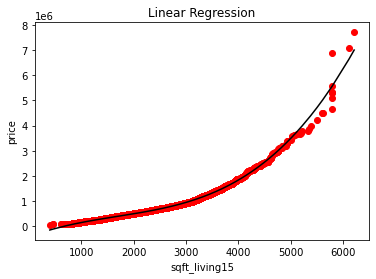

le performance de la régression Polynomial
MSE 581147178.9527545
R squared 0.9957866725449255


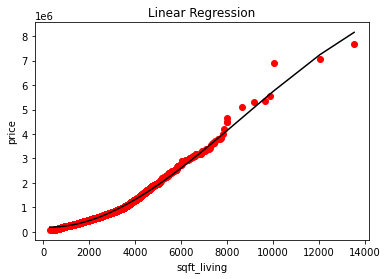

le performance de la régression Polynomial
MSE 986180475.5058467
R squared 0.9928501738912423


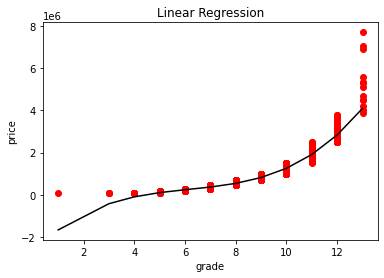

le performance de la régression Polynomial
MSE 9051027480.788431
R squared 0.934379888670955


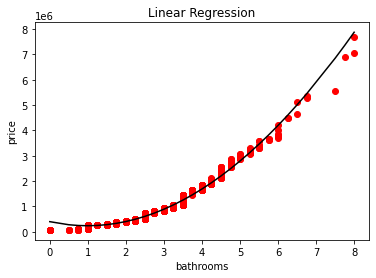

le performance de la régression Polynomial
MSE 3306069720.2007713
R squared 0.9760309353206978


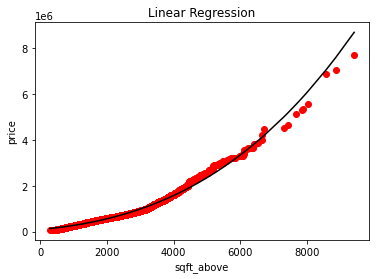

le performance de la régression Polynomial
MSE 1672662990.0452821
R squared 0.9878731633667316
le performance de la polynomiale avec tout les entres
MSE 50693472532.312805
R squared 0.6324714162798589


In [98]:


#régression polynomiale
for key,value in x.items():
    x_train,x_test,y_train,y_test=train_test_split(value,y,test_size=0.35,random_state=40)
    #value = dataset.sort_values(by=['col1'])
    model=LinearRegression() 
    poly=PolynomialFeatures(degree=3)
    x_train_fit = poly.fit_transform(x_train) 
    
    model.fit(x_train_fit,y_train)
    x_test_ = poly.fit_transform(x_test)
    predicted=model.predict(x_test_)
    

    plt.scatter(value,y,color="r")
    plt.title("Linear Regression")
    plt.ylabel("price")
    plt.xlabel(key)
    plt.plot(value,model.predict(poly.fit_transform(value)),color="k")
    plt.show()
    print('le performance de la régression Polynomial')
    print("MSE", mean_squared_error(y_test,predicted))
    print("R squared", metrics.r2_score(y_test,predicted))

#régression polynomiale avec tout les entres
x_train, x_test, y_train, y_test = train_test_split(x2,y, test_size=0.35, random_state=40)

model=LinearRegression() 
poly=PolynomialFeatures(degree=3)
x_train_fit = poly.fit_transform(x_train) 

model.fit(x_train_fit,y_train)
x_test_ = poly.fit_transform(x_test)
predicted=model.predict(x_test_)

print('le performance de la polynomiale avec tout les entres')
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

la régression polynomiale est plus performant que la linéaire et la multi-linéaire car elle produit moins d'erreur et elle est plus adaptée a nos donnees